# Exercise 1 
- Simulate the position of dart throws by two players using the following criteria:
    - Player 1: mean x, y position = (0, 0), cov matrix = [[1, 0]  [0, 2]]
    - Player 2: mean x, y position = (2, 1), cov matrix = [[3, -2], [-2, 2]]
- Draw contourplot displaying the joint probability distributions
- Generate 200 samples each for both players and plot those -> use `numpy.random.choice`

In [1]:
print("Hello priya")

Hello priya


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
mean_player1 = [0, 0]
cov_matrix_player1 = [[1, 0], [0, 2]]

mean_player2 = [2, 1]
cov_matrix_player2 = [[3, -2], [-2, 2]]

num_samples = 200

player1_samples = np.random.multivariate_normal(mean_player1, cov_matrix_player1, num_samples)
player2_samples = np.random.multivariate_normal(mean_player2, cov_matrix_player2, num_samples)


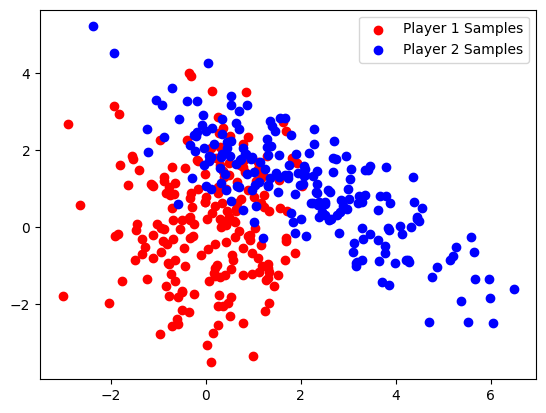

In [9]:


plt.scatter(player1_samples[:, 0], player1_samples[:, 1], c='r', label='Player 1 Samples')
plt.scatter(player2_samples[:, 0], player2_samples[:, 1], c='b', label='Player 2 Samples')
plt.legend()
plt.show()


<ipython-input-24-696ce726f9fd>:35: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_player1, levels=10, cmap='Reds', alpha=0.6, label='Player 1')
<ipython-input-24-696ce726f9fd>:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_player2, levels=10, cmap='Blues', alpha=0.6, label='Player 2')


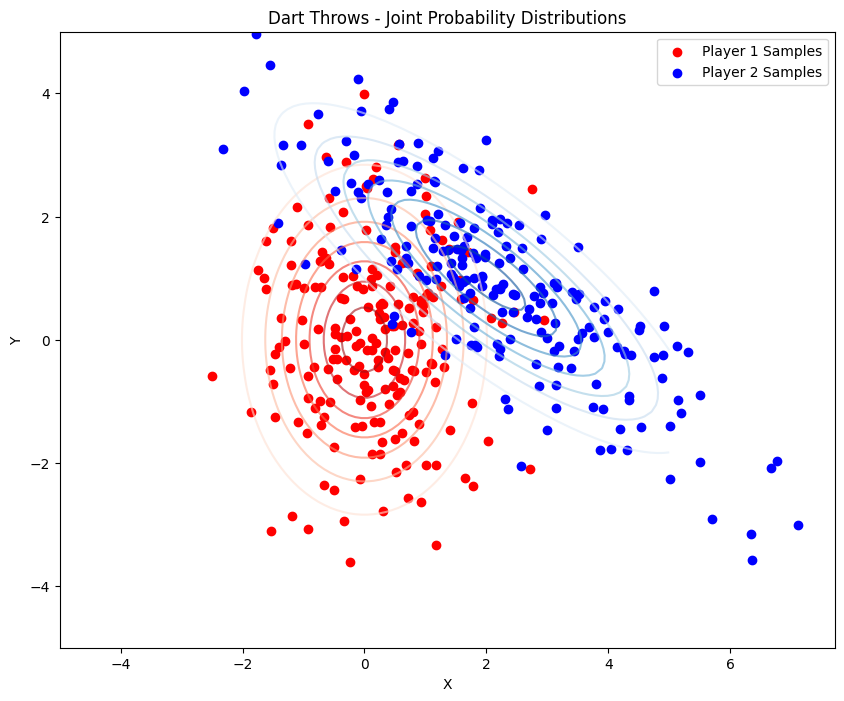

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define mean and covariance matrices for Player 1 and Player 2
mean_player1 = [0, 0]
cov_matrix_player1 = [[1, 0], [0, 2]]

mean_player2 = [2, 1]
cov_matrix_player2 = [[3, -2], [-2, 2]]

# Generate dart throw samples for Player 1 and Player 2
num_samples = 200

player1_samples = np.random.multivariate_normal(mean_player1, cov_matrix_player1, num_samples)
player2_samples = np.random.multivariate_normal(mean_player2, cov_matrix_player2, num_samples)

# Plot the joint probability distributions as contour plots
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
#print(X,Y)

# Calculate the joint probability distributions for Player 1 and Player 2
Z_player1 = multivariate_normal(mean_player1, cov_matrix_player1).pdf(np.dstack((X, Y)))
Z_player2 = multivariate_normal(mean_player2, cov_matrix_player2).pdf(np.dstack((X, Y)))

# Plot the contour plots
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z_player1, colors='r', alpha=0.6, label='Player 1')
plt.contour(X, Y, Z_player2, colors='b', alpha=0.6, label='Player 2')



# Plot the dart throw samples
plt.scatter(player1_samples[:, 0], player1_samples[:, 1], c='r', label='Player 1 Samples')
plt.scatter(player2_samples[:, 0], player2_samples[:, 1], c='b', label='Player 2 Samples')

# Set plot title and labels
plt.title('Dart Throws - Joint Probability Distributions')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:

# Plot the contour plots
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z_player1, colors='r', alpha=0.6, label='Player 1')
plt.contour(X, Y, Z_player2, colors='b', alpha=0.6, label='Player 2')

# Plot the dart throw samples
plt.scatter(player1_samples[:, 0], player1_samples[:, 1], c='r', label='Player 1 Samples')
plt.scatter(player2_samples[:, 0], player2_samples[:, 1], c='b', label='Player 2 Samples')

# Set plot title and labels
plt.title('Dart Throws - Joint Probability Distributions')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()
plt.grid(True)
# Display the plot
plt.show()


# Exercise 2 
- Label points from player 1 as `0` and points from player 2 as `1`. 
- Use `logistic regression` from scipy to classify these points.
    - Check performance using `accuracy_score` from `sklearn.metrics`. 
- Implement your own logistic regression by filling out the functions in the skeleton below.
    - Discover tricks to make this converge faster. 
- Implement the gradient function using:
    - The direct method - find out the actual function [from the lecture slides](https://docs.google.com/presentation/d/1fnftEMoecsjflXaIkFUSDcbVg2ksqd9EiOOCC-UwPkU/edit?usp=sharing): 
    - Numeric/analytical method by computing numeric gradients (if you've already implemented using the direct method above, then just do numeric)
- Use any other ML method to achieve better performance - SVM, Neural Networks, etc.

In [ ]:
# fill this out

class LogisticRegressionCustom:
    """
    Implement the functions that have pass written.
    """
    T = 1e5
    LR = 0.01
    thresh = 1e-5
    
    def get_prob(self, X, beta):
      dotp=np.dot(X,beta) 
      return 1/(1+np.exp(-dotp))                           
        

    def loss(self, X, beta, y):
        prob = self.get_prob(X, beta)
        return -np.mean(y * np.log(prob) + (1 - y) * np.log(1 - prob))
    
    def gradient(self, X, beta, y):
        prob = self.get_prob(X, beta)
        return np.dot(X.T, prob - y) / len(y)
    
    
    def gradient_descent_fit(self, X, beta, y):
        count = 0
        beta_ = np.copy(beta)
        while count < self.T:
            count += 1
            grad = self.gradient(X, beta_, y)
            beta_ -= self.LR * grad
            if np.sum(np.abs(grad)) < self.thresh:
                break
        return beta_

    def fit(self, X, y):
        self.beta = np.zeros((X.shape[1] + 1))
        self.beta += np.random.randn(X.shape[1] + 1)
        intercept_X = np.ones((X.shape[0], 1))
        self.X = np.concatenate((intercept_X, X), axis=1)
        self.y = y
        
        fitted_beta = self.grad_descent_fit(
            self.X, self.beta, self.y
        )
        self.beta = fitted_beta
        return self.beta
    
    def predict(self, X):
        intercept_X = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept_X, X), axis=1)
        prob = self.get_prob(X, self.beta)
        return np.round(prob)
